In [3]:
import os
import sys

wd = os.path.abspath(os.getcwd())
sys.path.append(str(wd))

import time
import matplotlib.pyplot as plt
from matplotlib import ticker

import numpy as np
import pickle

In [ ]:
name = "informed2d"
# name = "connect2d"
# name = "connectlocgap2d"
# name = "connectstar2d"
# name = "connectstarlocgap2d"

with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/single2d/{name}_costgraph.pkl", "rb") as file:
    loadedList = pickle.load(file)

In [4]:
def get_data_plot(loadedList):
    # Determine a common set of x-values based on the range of x-values in the datasets
    x_min = min(min(data_set, key=lambda x: x[0])[0] for data_set in loadedList)
    # x_max = max(max(data_set, key=lambda x: x[0])[0] for data_set in loadedList)
    common_x_values = np.arange(x_min, 2000, 1)

    # Interpolate y-values for the common_x_values in each dataset
    interpolated_data_sets = []
    for data_set in loadedList:
        x_values, y_values = zip(*data_set)
        interpolated_y_values = np.interp(common_x_values, x_values, y_values)
        interpolated_data_sets.append(interpolated_y_values)

    # Calculate the mean curve
    mean_curve = np.mean(interpolated_data_sets, axis=0)
    std_curve = np.std(interpolated_data_sets, axis=0)
    mean_p_std = mean_curve + std_curve
    mean_m_std = mean_curve - std_curve
    return common_x_values, mean_curve, mean_p_std, mean_m_std

# Not Corret Yet

In [ ]:
def checkgap(gap, x):
    for i in range(len(gap)-1):
        lb = gap[i]
        ub = gap[i+1]
        if lb < x <= ub:
            # print(f"x is in gap of lb={lb} and ub={ub}")
            break
    return i, i+1

In [ ]:
def update_gap(iteration_original, cost_original, iteration_interpolated, cost_interpolated):
    for j, x in enumerate(iteration_original):
        if j == 0:
            continue
        lbi, ubi = checkgap(iteration_interpolated, x)
        cost_interpolated[lbi] = cost_original[j-1]
        cost_interpolated[ubi] = cost_original[j]

In [ ]:
def fill_gap(cost_interpolated):
    firstNone = True
    for i, ix in enumerate(cost_interpolated):
        if ix is not None:
            firstNone = False
        if firstNone is False:
            if ix is None:
                cost_interpolated[i] = cost_interpolated[i-1]

In [ ]:
def interapolate_cost_graph(singlelist):
    iteration_original, cost_original = zip(*singlelist)
    iteration_interpolated = np.arange(0,2050,50)
    cost_interpolated = [None]*len(iteration_interpolated)
    update_gap(iteration_original, cost_original, iteration_interpolated, cost_interpolated)
    fill_gap(cost_interpolated)
    return iteration_interpolated, cost_interpolated

In [ ]:
common_x_values, mean_curve, mean_p_std, mean_m_std = get_data_plot(loadedList)
# Plot the mean curve
plt.figure(figsize=(15, 10))
plt.plot(common_x_values, mean_curve, label="Mean Curve")
plt.fill_between(common_x_values, mean_p_std, mean_m_std, alpha=0.3)
plt.xlabel("X Values")
plt.ylabel("Mean Y Values")
plt.title("Mean Curve")
plt.legend()

# Single List

In [ ]:
iteration_interpolated, cost_interpolated = interapolate_cost_graph(loadedList[4])
plt.plot(iteration_interpolated, cost_interpolated)

# Per Planner Plot

In [ ]:
iteration_interpolated = np.arange(0,2050,50)
trial_data = []
for i in range(len(loadedList)):
    _, cost_interpolated = interapolate_cost_graph(loadedList[i])
    trial_data.append(cost_interpolated)

In [ ]:
for i in range(100):
    plt.plot(iteration_interpolated, trial_data[i], 'r-')

In [ ]:
def get_mean_std(plannercostlist):
    trial_data = []
    for i in range(len(plannercostlist)):
        iteration_interpolated, cost_interpolated = interapolate_cost_graph(plannercostlist[i])
        trial_data.append(cost_interpolated)

    trial_data = np.array(trial_data, dtype=np.float64)
    mean = np.nanmean(trial_data, axis=0)
    std = np.nanstd(trial_data, axis=0)
    meanpstd = mean+std
    meanmstd = mean-std
    return iteration_interpolated, mean, meanpstd, meanmstd

In [ ]:
iteration_interpolated, mean, meanpstd, meanmstd = get_mean_std(loadedList)
print(f"==>> iteration_interpolated: {iteration_interpolated}")
print(f"==>> mean: {mean}")
print(f"==>> meanpstd: {meanpstd}")
print(f"==>> meanmstd: {meanmstd}")

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(iteration_interpolated, mean)
# plt.plot(iteration_interpolated, meanpstd)
# plt.plot(iteration_interpolated, meanmstd)
plt.fill_between(iteration_interpolated, meanpstd, meanmstd, color='blue', alpha=0.3, label="Mean ± Var")


#

# All data plot (Used Linear Interpolation)

In [3]:
nameinform = "informed2d"
multi_nameconnect = "connect2d"
multi_nameconnectlocgap = "connectlocgap2d"
multi_nameconnectstar = "connectstar2d"
multi_nameconnectstarlocgap = "connectstarlocgap2d"

with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/single2d/{nameinform}_costgraph.pkl", "rb") as file:
    informloadedList = pickle.load(file)
with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/single2d/{multi_nameconnect}_costgraph.pkl", "rb") as file:
    multi_connectloadedList = pickle.load(file)
with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/single2d/{multi_nameconnectlocgap}_costgraph.pkl", "rb") as file:
    multi_connectlocgaploadedList = pickle.load(file)
with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/single2d/{multi_nameconnectstar}_costgraph.pkl", "rb") as file:
    multi_connectstarloadedList = pickle.load(file)
with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/single2d/{multi_nameconnectstarlocgap}_costgraph.pkl", "rb") as file:
    multi_connectstarlocgaploadedList = pickle.load(file)

In [4]:
common_x_values_inform, mean_curve_inform, mean_p_std_inform, mean_m_std_inform = get_data_plot(informloadedList)
common_x_values_connect, mean_curve_connect, mean_p_std_connect, mean_m_std_connect = get_data_plot(multi_connectloadedList)
common_x_values_connect_loc, mean_curve_connect_loc, mean_p_std_connect_loc, mean_m_std_connect_loc = get_data_plot(multi_connectlocgaploadedList)
common_x_values_connectstar, mean_curve_connectstar, mean_p_std_connectstar, mean_m_std_connectstar = get_data_plot(multi_connectstarloadedList)
common_x_values_connectstar_loc, mean_curve_connectstar_loc, mean_p_std_connectstar_loc, mean_m_std_connectstar_loc = get_data_plot(multi_connectstarlocgaploadedList)

# iteration_interpolated_inform, mean_inform, meanpstd_inform, meanmstd_inform = get_mean_std(informloadedList)
# iteration_interpolated_connect, mean_connect, meanpstd_connect, meanmstd_connect = get_mean_std(connectloadedList)
# iteration_interpolated_connectlocgap, mean_connectlocgap, meanpstd_connectlocgap, meanmstd_connectlocgap = get_mean_std(connectlocgaploadedList)
# iteration_interpolated_connectstar, mean_connectstar, meanpstd_connectstar, meanmstd_connectstar = get_mean_std(connectstarloadedList)
# iteration_interpolated_connectstarlocgap, mean_connectstarlocgap, meanpstd_connectstarlocgap, meanmstd_connectstarlocgap = get_mean_std(connectstarlocgaploadedList)

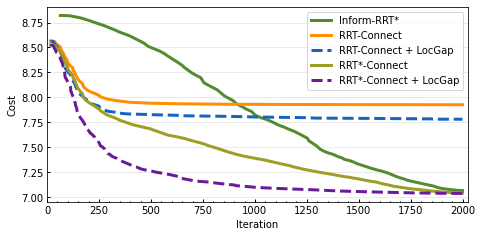

In [6]:
fig = plt.figure(figsize=(3.40067*2,3.40067), frameon=True, layout='tight')
ax = plt.subplot(1,1,1)

ax.plot(common_x_values_inform, mean_curve_inform, label="Inform-RRT*", linewidth=3, linestyle='solid', color="#558b2f")
ax.plot(common_x_values_connect, mean_curve_connect, label="RRT-Connect", linewidth=3, linestyle='solid', color="#ff8f00")
ax.plot(common_x_values_connect_loc, mean_curve_connect_loc, label="RRT-Connect + LocGap", linewidth=3, linestyle='--', color="#1565c0")
ax.plot(common_x_values_connectstar, mean_curve_connectstar, label="RRT*-Connect", linewidth=3, linestyle='solid', color="#9e9d24")
ax.plot(common_x_values_connectstar_loc, mean_curve_connectstar_loc, label="RRT*-Connect + LocGap", linewidth=3, linestyle='--', color="#6a1b9a")


# plt.fill_between(common_x_values_inform, mean_p_std_inform, mean_m_std_inform, alpha=0.05)
# plt.fill_between(common_x_values_connect, mean_p_std_connect, mean_m_std_connect, alpha=0.05)
# plt.fill_between(common_x_values_connect_loc, mean_p_std_connect_loc, mean_m_std_connect_loc, alpha=0.05)
# plt.fill_between(common_x_values_connectstar, mean_p_std_connectstar, mean_m_std_connectstar, alpha=0.05)
# plt.fill_between(common_x_values_connectstar_loc, mean_p_std_connectstar_loc, mean_m_std_connectstar_loc, alpha=0.05)
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")
ax.grid(axis='y')
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(axis = "both", which="major", direction='in', length=3, width=1, colors='black', grid_color='gray', grid_alpha=0.2)
ax.tick_params(axis = "both", which="minor", direction='in', length=1, width=1, colors='black', grid_color='gray', grid_alpha=0.1)
ax.set_xlim((0,2025))
ax.legend()

# fig.savefig(f"/home/yuth/figgggg.pdf", format='pdf', bbox_inches='tight')

# Multi Case

In [5]:
multi_nameconnect = "multi_connect2d"
multi_nameconnectlocgap = "multi_connectlocgap2d"
multi_nameconnectstar = "multi_connectstar2d"
multi_nameconnectstarlocgap = "multi_connectstarlocgap2d"

with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/multi2d/{multi_nameconnect}_costgraph.pkl", "rb") as file:
    multi_connectloadedList = pickle.load(file)
with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/multi2d/{multi_nameconnectlocgap}_costgraph.pkl", "rb") as file:
    multi_connectlocgaploadedList = pickle.load(file)
with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/multi2d/{multi_nameconnectstar}_costgraph.pkl", "rb") as file:
    multi_connectstarloadedList = pickle.load(file)
with open(f"/home/yuth/ws_yuthdev/robotics_manipulator/datasave/planner_performance/multi2d/{multi_nameconnectstarlocgap}_costgraph.pkl", "rb") as file:
    multi_connectstarlocgaploadedList = pickle.load(file)

In [6]:
multi_common_x_values_connect, multi_mean_curve_connect, multi_mean_p_std_connect, multi_mean_m_std_connect = get_data_plot(multi_connectloadedList)
multi_common_x_values_connect_loc, multi_mean_curve_connect_loc, multi_mean_p_std_connect_loc, multi_mean_m_std_connect_loc = get_data_plot(multi_connectlocgaploadedList)
multi_common_x_values_connectstar, multi_mean_curve_connectstar, multi_mean_p_std_connectstar, multi_mean_m_std_connectstar = get_data_plot(multi_connectstarloadedList)
multi_common_x_values_connectstar_loc, multi_mean_curve_connectstar_loc, multi_mean_p_std_connectstar_loc, multi_mean_m_std_connectstar_loc = get_data_plot(multi_connectstarlocgaploadedList)


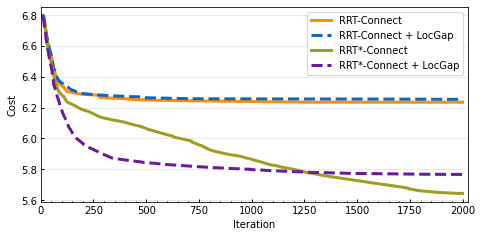

In [7]:
fig1 = plt.figure(figsize=(3.40067*2,3.40067), frameon=True, layout='tight')
ax1 = plt.subplot(1,1,1)

ax1.plot(multi_common_x_values_connect, multi_mean_curve_connect, label="RRT-Connect", linewidth=3, linestyle='solid', color="#ff8f00")
ax1.plot(multi_common_x_values_connect_loc, multi_mean_curve_connect_loc, label="RRT-Connect + LocGap", linewidth=3, linestyle='--', color="#1565c0")
ax1.plot(multi_common_x_values_connectstar, multi_mean_curve_connectstar, label="RRT*-Connect", linewidth=3, linestyle='solid', color="#9e9d24")
ax1.plot(multi_common_x_values_connectstar_loc, multi_mean_curve_connectstar_loc, label="RRT*-Connect + LocGap", linewidth=3, linestyle='--', color="#6a1b9a")

ax1.set_xlabel("Iteration")
ax1.set_ylabel("Cost")
ax1.grid(axis='y')
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.tick_params(axis = "both", which="major", direction='in', length=3, width=1, colors='black', grid_color='gray', grid_alpha=0.2)
ax1.tick_params(axis = "both", which="minor", direction='in', length=1, width=1, colors='black', grid_color='gray', grid_alpha=0.1)
ax1.set_xlim((0,2025))
ax1.legend()

# fig.savefig(f"/home/yuth/figgggg.pdf", format='pdf', bbox_inches='tight')